            Inflation
Month                
2005-01-01        7.3
2005-02-01        7.3
2005-03-01        7.1
2005-04-01        7.2
2005-05-01        7.3
            Inflation
Month                
2024-08-01        3.3
2024-09-01        1.9
2024-10-01        2.3
2024-11-01        2.5
2024-12-01        2.9
Total: 240, Train: 228, Test: 12


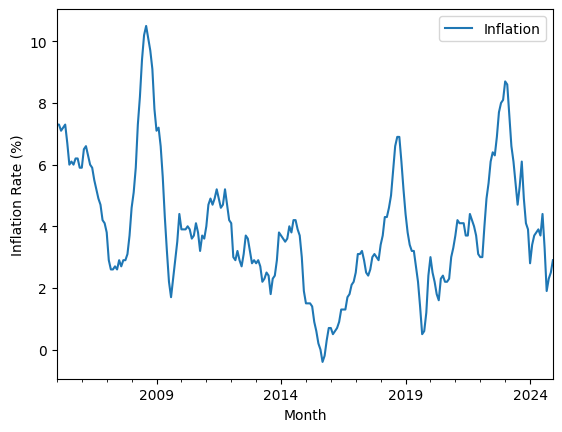

In [1]:
import pandas as pd
from utils import split

df = pd.read_csv("inflation.csv", index_col="Month", parse_dates=True)
df.index.freq = "MS"
# Use 2005-2024
df = df.iloc[12*(2005-1958):]
print(df.head())
print(df.tail())
df.plot(xlabel="Month", ylabel="Inflation Rate (%)")

train, test = split(df["Inflation"])

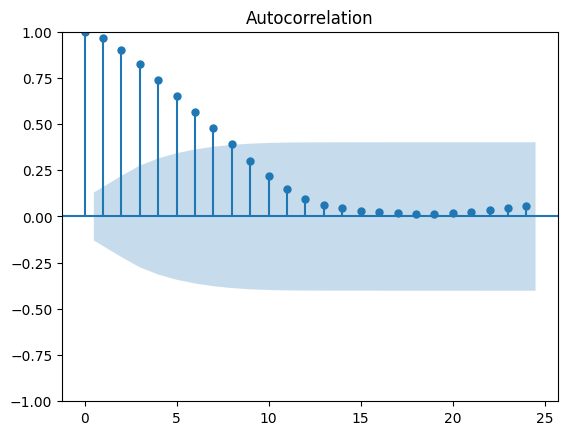

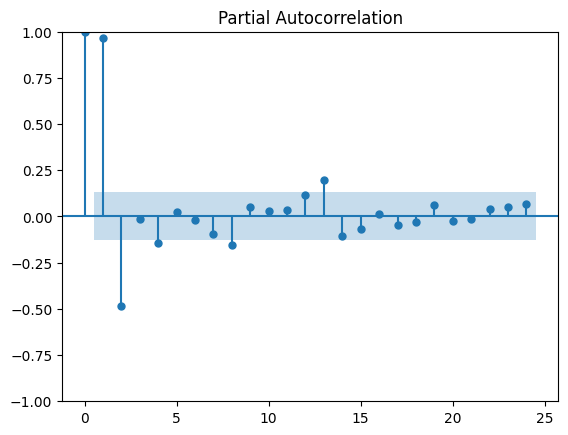

In [2]:
from utils import plot_autocorrelations

plot_autocorrelations(train)

In [3]:
from utils import arima_grid_search


model_fit, res = arima_grid_search(train, 0)



The Month is Stationary (p-value: 0.0393)
[1, 2, 4, 8, 12, 13, 14] [1, 2, 3, 4, 5, 6, 7, 8]
Trying 56 combinations...


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

               text  ar  d  ma         aic         bic
22   ARIMA(4, 0, 7)   4  0   7  205.314173  249.895666
23   ARIMA(4, 0, 8)   4  0   8  203.004633  251.015472
18   ARIMA(4, 0, 3)   4  0   3  224.269637  255.133748
19   ARIMA(4, 0, 4)   4  0   4  223.318083  257.611539
31   ARIMA(8, 0, 8)   8  0   8  197.387282  259.115503
14   ARIMA(2, 0, 7)   2  0   7  222.315466  260.038268
2    ARIMA(1, 0, 3)   1  0   3  241.069616  261.645690
9    ARIMA(2, 0, 2)   2  0   2  241.155930  261.732003
20   ARIMA(4, 0, 5)   4  0   5  225.559030  263.281832
8    ARIMA(2, 0, 1)   2  0   1  246.898518  264.045246
15   ARIMA(2, 0, 8)   2  0   8  223.867246  265.019393
0    ARIMA(1, 0, 1)   1  0   1  251.320912  265.038295
16   ARIMA(4, 0, 1)   4  0   1  241.320066  265.325486
3    ARIMA(1, 0, 4)   1  0   4  241.365425  265.370845
13   ARIMA(2, 0, 6)   2  0   6  231.512714  265.806170
10   ARIMA(2, 0, 3)   2  0   3  241.986403  265.991822
6    ARIMA(1, 0, 7)   1  0   7  232.392799  266.686255
47  ARIMA(

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month', ylabel='Inflation Rate (%)'>

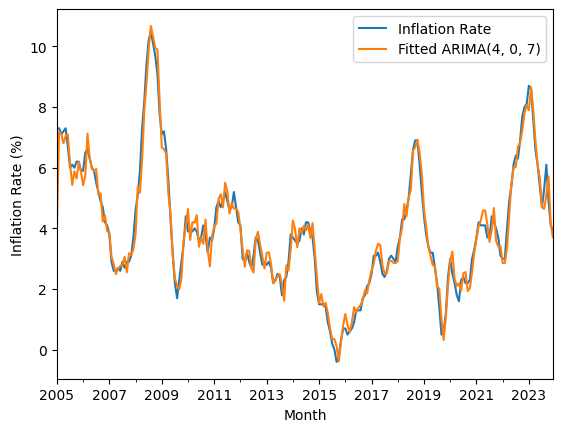

In [4]:
train.plot(legend=True,label="Inflation Rate", ylabel="Inflation Rate (%)", xlabel="Date (Monthly)")
model_fit.fittedvalues.plot(legend=True, label=f"Fitted {res["text"]}")

2024-01-01    3.405395
2024-02-01    3.635099
2024-03-01    4.273874
2024-04-01    4.706135
2024-05-01    4.095577
2024-06-01    4.063394
2024-07-01    4.692930
2024-08-01    4.489006
2024-09-01    4.081266
2024-10-01    4.362573
2024-11-01    4.444499
2024-12-01    4.050993
Freq: MS, Name: predicted_mean, dtype: float64

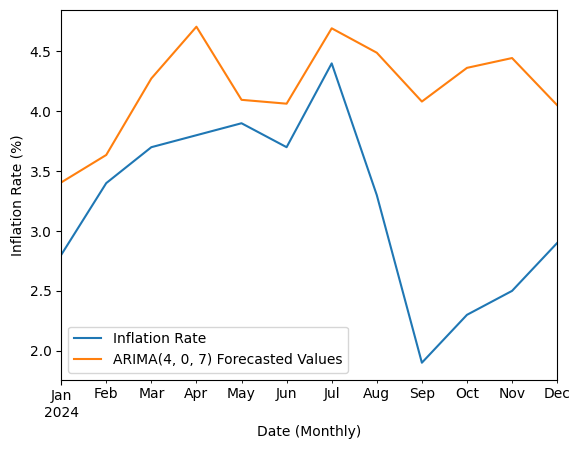

In [5]:
test.plot(legend=True,label="Inflation Rate", ylabel="Inflation Rate (%)", xlabel="Date (Monthly)")
forecasted_values = model_fit.forecast(12)
forecasted_values.plot(legend=True, label=f"{res["text"]} Forecasted Values")
forecasted_values

In [6]:
from utils import get_metrics


get_metrics(test, forecasted_values)

,Metric,Value
0,MAE,0.975062
1,MAPE,0.372805
2,MSE,1.446669


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2025-01-01    3.109095
2025-02-01    2.641868
2025-03-01    2.346822
2025-04-01    2.330286
2025-05-01    2.795683
2025-06-01    3.172493
2025-07-01    3.212354
2025-08-01    3.514091
2025-09-01    3.918268
2025-10-01    4.024002
2025-11-01    4.115665
2025-12-01    4.333502
Freq: MS, Name: predicted_mean, dtype: float64

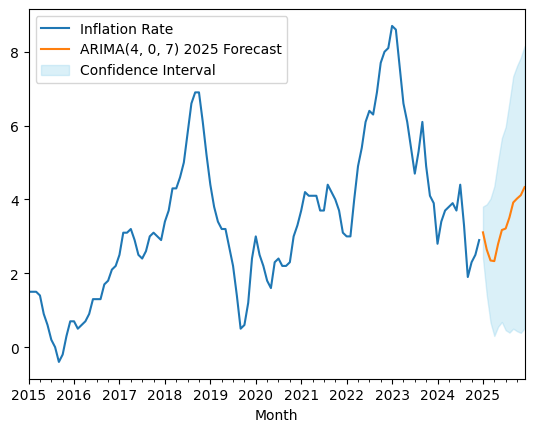

In [20]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(df, order=(res["ar"], res["d"], res["ma"])).fit()
df["Inflation"].iloc[-12*10:].plot(legend=True, label="Inflation Rate")

forecasted_values = model.forecast(len(test))
conf_int = model.get_forecast(len(test)).conf_int()
forecasted_values.plot(legend=True,label=f"{res["text"]} 2025 Forecast")
plt.fill_between(forecasted_values.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='skyblue', alpha=0.3, label='Confidence Interval',
                 )
plt.legend()
forecasted_values